In [54]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Load data
data = pd.read_csv("Dataset Donasi 2020-2022 Okt.csv",delimiter=",")

In [55]:
df = data.copy()
df

,ID_Donasi,Tanggal_Donasi,Cabang,Metode,Kategori,ID_Donatur,Nama_Donatur,Email,ID_Produk,Nama_Produk,...,No__IPP,No__IPQ,Marketer,Catatan,Catatan_Rekening_Koran,Deskripsi,Cabang_Rekening,Nomer_Referensi,Segmen,Unit_Value_Stream
0,D-2210-0005245,2022-10-27,Pusat,IPay88,Uang,'00595432,Ahyani,ahyaniamaliaa@gmail.com,'11801,Pembangunan Sarana Umum,...,NaN,NaN,Solusipeduli.org,NaN,NaN,Bangun Jembatan Desa untuk Wilayah Pelosok Negeri,Pusat,SP2022102757181,Digital Partnership,NaN
1,D-2210-0004960,2022-10-26,Pusat,Transfer,Uang,'00581534,Transfer Niaga Syariah Qurban (8620.8080.8700),NaN,'11901,Infaq Shodaqoh,...,NaN,NaN,Retail PKPU,Payment TRF FR CIMB NIAGA TRX CIMBNIAGA2...,Payment TRF FR CIMB NIAGA TRX CIMBNIAGA2...,-,Pusat,NaN,Customer Relationship Management,Pertumbuhan Penghimpunan Dana Ritel Tidak Teri...
2,D-2210-0004480,2022-10-26,Pusat,Transfer,Uang,'00547374,Tri Tresnawati,tr3.biandbi@gmail.com,'12102,Simpanan Qurban,...,NaN,NaN,Adella Aprilia Sugianto,NaN,TRANSFER DARI | Tab Qurban ke 2 | Ibu TRI TRE...,Titipan Qurban,Pusat,NaN,Customer Relationship Management,Penghimpunan Dana Pengelolaan Program Qurban
3,D-2210-0004822,2022-10-26,Pusat,Transfer,Uang,'00461689,Puji Putri Pertiwi,pertiwi4195@gmail.com,'10317,Orang Tua Asuh Palestina,...,NaN,NaN,Maria Paquita,NaN,DANA001012548067011 012548067011\nMCM Inhouse...,OTA Palestina,Pusat,NaN,Customer Relationship Management,Penghimpunan Dana dan Pengelolaan Program Chil...
4,D-2210-0004822,2022-10-26,Pusat,Transfer,Uang,'00461689,Puji Putri Pertiwi,pertiwi4195@gmail.com,'10316,Orang Tua Asuh Umum,...,NaN,NaN,Maria Paquita,NaN,DANA001012548067011 012548067011\nMCM Inhouse...,OTA,Pusat,NaN,Customer Relationship Management,Penghimpunan Dana dan Pengelolaan Program Chil...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280329,D-2108-0000723,2021-08-04,Pusat,Transfer,Uang,'00560410,AHMAD PURBAYA,cantib@gmx.net,'1170606,Peduli Syria,...,NaN,NaN,Solusipeduli.org,NaN,TRF Dari - 22 - CANTI BESARI,Save Syirian Children,Pusat,SP2021080432914,Digital Partnership,Pertumbuhan Donatur yang Mengakses Layanan Man...
280330,D-2109-0000078,2021-09-01,Pusat,Transfer,Uang,'00560410,AHMAD PURBAYA,cantib@gmx.net,'1170606,Peduli Syria,...,NaN,NaN,Solusipeduli.org,NaN,TRF Dari - 22 - CANTI BESARI,Save Syirian Children,Pusat,SP2021090134347,Digital Partnership,Pertumbuhan Donatur yang Mengakses Layanan Man...
280331,D-2110-0004245,2021-10-12,Pusat,Transfer,Uang,'00582355,Putri Zufianita,vianitasachi@gmail.com,'11902,Sebar Al Quran Nusantara (SAN),...,NaN,NaN,Solusipeduli.org,NaN,12/10/2021 20.08.57 ...,Bantu Belikan Al-Quran untuk Tahfidz Kecil,Pusat,SP2021101236467,Digital Partnership,Pertumbuhan Donatur yang Mengakses Layanan Man...
280332,D-2011-0005393,2020-11-26,Pusat,Transfer,Uang,'00491608,Uswatun Soleha,uswah_eha@yahoo.co.id,'10316,Orang Tua Asuh Umum,...,NaN,NaN,Arief Rachman Pratama,TRF Dari - 014 - USWATUN SHOLEHA,TRF Dari - 014 - USWATUN SHOLEHA,ota bulan november- uswatun soleha,Pusat,NaN,NaN,Pertumbuhan Donatur yang Mengakses Layanan Man...


In [56]:
# mengetahui ukuran baris dan kolom
df.shape

(280334, 31)

In [5]:
# mengetahui info tentang dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280334 entries, 0 to 280333
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Donasi               280334 non-null  object 
 1   Tanggal_Donasi          280334 non-null  object 
 2   Cabang                  280334 non-null  object 
 3   Metode                  280334 non-null  object 
 4   Kategori                280334 non-null  object 
 5   ID_Donatur              279935 non-null  object 
 6   Nama_Donatur            279936 non-null  object 
 7   Email                   97964 non-null   object 
 8   ID_Produk               280254 non-null  object 
 9   Nama_Produk             280254 non-null  object 
 10  Nilai_Donasi            280326 non-null  float64
 11  Kode_Valuta             280334 non-null  object 
 12  Nilai_Valuta            280334 non-null  float64
 13  Nilai_Ekuivalen         280326 non-null  float64
 14  Saldo               

In [6]:
# melihat beberapa detail statistik dasar
df.describe()

,Nilai_Donasi,Nilai_Valuta,Nilai_Ekuivalen,Saldo
count,2.803260e+05,280334.000000,2.803260e+05,2.803280e+05
mean,1.237498e+06,296.086742,2.025302e+06,4.195632e+05
std,2.202051e+07,2167.531223,3.112940e+07,1.320659e+07
min,-7.493584e+06,1.000000,-7.493584e+06,-6.460866e+08
25%,7.000000e+03,1.000000,1.000000e+04,0.000000e+00
50%,9.990000e+04,1.000000,1.000000e+05,0.000000e+00
75%,3.000000e+05,1.000000,3.500000e+05,1.000000e+03
max,4.529029e+09,20320.900000,4.529029e+09,2.332202e+09


In [57]:
# function untuk Check Data Quality 

def check_data_quality(input_data):
    
  # melihat hasil data duplikat dalam bentuk persentase

  duplication = input_data.duplicated().sum()/input_data.shape[0]*100
  print("There are around {:.2f}% of data duplication \n".format(duplication))

  # melihat hasil data null value dalam bentuk persentase
    
  type_null = pd.DataFrame(input_data.dtypes).T.rename(index = {0: 'Columns Type'})
  type_null = type_null.append(pd.DataFrame(input_data.isnull().sum()).T.rename(index = {0: 'Amount of Null Values'}))
  type_null = type_null.append(pd.DataFrame(input_data.isnull().sum()/input_data.shape[0]*100).T.rename(index = {0: 'Percentage of Null Values'}))
  
  return(type_null.T)

In [110]:
def check_data_quality(input_data):
    
    # check for duplicated rows
    duplication = input_data.duplicated().sum()/input_data.shape[0]*100
    print("There are around {:.2f}% of data duplication \n".format(duplication))

    # check for null values
    null_values = input_data.isnull().sum()
    null_cols = null_values[null_values/input_data.shape[0] > 0.05].index
    
    if len(null_cols) > 0:
        type_null = pd.DataFrame(input_data[null_cols].dtypes).T.rename(index = {0: 'Columns Type'})
        type_null = type_null.append(pd.DataFrame(null_values[null_cols]).T.rename(index = {0: 'Amount of Null Values'}))
        type_null = type_null.append(pd.DataFrame(null_values[null_cols]/input_data.shape[0]*100).T.rename(index = {0: 'Percentage of Null Values'}))

        return type_null.T
    else:
        print("There are no columns with more than 20% null values in the input data.")


In [111]:
check_data_quality(df)

There are around 1.33% of data duplication 



C:\Users\awx927900\AppData\Local\Temp\ipykernel_15584\2490856989.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  type_null = type_null.append(pd.DataFrame(null_values[null_cols]).T.rename(index = {0: 'Amount of Null Values'}))
C:\Users\awx927900\AppData\Local\Temp\ipykernel_15584\2490856989.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  type_null = type_null.append(pd.DataFrame(null_values[null_cols]/input_data.shape[0]*100).T.rename(index = {0: 'Percentage of Null Values'}))


,Columns Type,Amount of Null Values,Percentage of Null Values
Email,object,182370,65.054542
Nama_Bank,object,37452,13.359778
No__Rekening,object,37452,13.359778
No__KM,object,37568,13.401157
No__IPP,object,139552,49.780619
No__IPQ,object,273336,97.503692
Catatan,object,109375,39.01596
Catatan_Rekening_Koran,object,60078,21.430865
Deskripsi,object,32876,11.727439
Nomer_Referensi,object,236134,84.233093


In [9]:
# Function untuk pengkategorian berdasarkan nama_produk

def categorize(product_name):
    words =  ['Aqiqah', 'Sapi', 'Domba', 'Kambing', 'Qurban', 
              'Ternak','Banjir', 'Bencana', 'Tsunami', 'Gempa', 
              'Covid19', 'Covid']
    categories = {'Qurban': ['Aqiqah', 'Sapi', 'Domba', 'Kambing', 'Qurban', 'Ternak'],
                  'Bencana': ['Banjir', 'Bencana', 'Tsunami', 'Gempa', 'Covid19', 'Covid']}
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in product_name:
                return category
    return 'Kemanusiaan'

In [10]:
def cleaning(df_input):
    df = df_input.copy()
    
    # Drop high nan and multicollinearity features
    col_drop_feat = ['Email', 'Nilai_Donasi','Nilai_Valuta','Saldo',
                     'Nama_Bank','No__Rekening', 'Bank_Rekening','Deskripsi','Status_CRM', 
                     'Status_Keu','No__KM','No__IPP','No__IPQ','Catatan','Catatan_Rekening_Koran',
                     'Cabang_Rekening','Nomer_Referensi','Segmen','Unit_Value_Stream']
    df.drop(col_drop_feat, axis=1, inplace=True)
    
    # Replace NaN values with an empty string
    df['Nama_Produk'] = df['Nama_Produk'].fillna(' ')


    # Drop duplicate
    df['Kategori_Produk_Umum'] = df["Nama_Produk"].apply(lambda x: categorize(x))
    df_qurban = df[df['Kategori_Produk_Umum'] == 'Qurban']
    df_nonqurban = df[df['Kategori_Produk_Umum'] != 'Qurban']
    df_nonqurban.drop_duplicates(inplace=True)
    df = pd.concat([df_nonqurban, df_qurban])

    # Drop rows with negative values in Nilai Ekuivalen
    df = df[df['Nilai_Ekuivalen'] > 0]

    # Drop NaN
    df.dropna(inplace=True)

    # convert dtype Nilai Ekuivalen to Int
    df['Nilai_Ekuivalen'] = df['Nilai_Ekuivalen'].astype(int)
    
    # Convert dtype Tanggal Donasi to datetime
    df['Tanggal_Donasi'] = df['Tanggal_Donasi'].astype('datetime64')

    # Reset index
    df.reset_index(drop=True, inplace=True)

    return df

In [11]:
# Cleaning dataframe df
df_clean = cleaning(df)

In [12]:
df_clean

,ID_Donasi,Tanggal_Donasi,Cabang,Metode,Kategori,ID_Donatur,Nama_Donatur,ID_Produk,Nama_Produk,Kode_Valuta,Nilai_Ekuivalen,Marketer,Kategori_Produk_Umum
0,D-2210-0005245,2022-10-27,Pusat,IPay88,Uang,'00595432,Ahyani,'11801,Pembangunan Sarana Umum,IDR,15500,Solusipeduli.org,Kemanusiaan
1,D-2210-0004960,2022-10-26,Pusat,Transfer,Uang,'00581534,Transfer Niaga Syariah Qurban (8620.8080.8700),'11901,Infaq Shodaqoh,IDR,71000,Retail PKPU,Kemanusiaan
2,D-2210-0004822,2022-10-26,Pusat,Transfer,Uang,'00461689,Puji Putri Pertiwi,'10317,Orang Tua Asuh Palestina,IDR,550000,Maria Paquita,Kemanusiaan
3,D-2210-0004822,2022-10-26,Pusat,Transfer,Uang,'00461689,Puji Putri Pertiwi,'10316,Orang Tua Asuh Umum,IDR,150363,Maria Paquita,Kemanusiaan
4,D-2210-0005016,2022-10-26,KC Bengkulu,Tunai,Uang,'00578569,Keluarga Sari,'11901,Infaq Shodaqoh,IDR,7400,Indriati,Kemanusiaan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279157,D-2107-0004616,2021-07-15,Pusat,Transfer,Qurban,'00558568,Susatyo Jati Pratomo,'12131,1/7 Sapi Tipe C,IDR,2450000,Arief Rachman Pratama,Qurban
279158,D-2107-0007163,2021-07-19,Pusat,Transfer,Qurban,'00577261,Joko Indaryanto,'12131,1/7 Sapi Tipe C,IDR,2450000,Solusipeduli.org,Qurban
279159,D-2107-0006750,2021-07-19,Pusat,Transfer,Qurban,'00577052,Syaifur Rachman,'12131,1/7 Sapi Tipe C,IDR,2450000,Arief Rachman Pratama,Qurban
279160,D-2107-0006801,2021-07-19,Pusat,Transfer,Qurban,'00577040,Winda Puspoyo,'12132,Sapi Tipe C,IDR,17150000,Solusipeduli.org,Qurban


In [13]:
check_data_quality(df_clean)

There are around 1.52% of data duplication 



C:\Users\awx927900\AppData\Local\Temp\ipykernel_15584\4140843481.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  type_null = type_null.append(pd.DataFrame(input_data.isnull().sum()).T.rename(index = {0: 'Amount of Null Values'}))
C:\Users\awx927900\AppData\Local\Temp\ipykernel_15584\4140843481.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  type_null = type_null.append(pd.DataFrame(input_data.isnull().sum()/input_data.shape[0]*100).T.rename(index = {0: 'Percentage of Null Values'}))


,Columns Type,Amount of Null Values,Percentage of Null Values
ID_Donasi,object,0,0.0
Tanggal_Donasi,datetime64[ns],0,0.0
Cabang,object,0,0.0
Metode,object,0,0.0
Kategori,object,0,0.0
ID_Donatur,object,0,0.0
Nama_Donatur,object,0,0.0
ID_Produk,object,0,0.0
Nama_Produk,object,0,0.0
Kode_Valuta,object,0,0.0


In [90]:
# Slicing fitur Untuk eksplorasi
de = df_clean
de

,ID_Donasi,Tanggal_Donasi,Cabang,Metode,Kategori,ID_Donatur,Nama_Donatur,ID_Produk,Nama_Produk,Kode_Valuta,Nilai_Ekuivalen,Marketer,Kategori_Produk_Umum,payment_metode,Grup_Cabang,Month,Year,Nilai_Ekuivalen_Miliar
0,D-2210-0005245,2022-10-27,Pusat,IPay88,Uang,'00595432,Ahyani,'11801,Pembangunan Sarana Umum,IDR,15500,Solusipeduli.org,Kemanusiaan,Transfer,Nasional,October,2022,1.550000e-05
4,D-2210-0005016,2022-10-26,KC Bengkulu,Tunai,Uang,'00578569,Keluarga Sari,'11901,Infaq Shodaqoh,IDR,7400,Indriati,Kemanusiaan,Cash/Direct,Nasional,October,2022,7.400000e-06
5,D-2210-0005032,2022-10-26,Pusat,Transfer,Uang,'00563193,kurnia afridilla,'11901,Infaq Shodaqoh,IDR,3,Solusipeduli.org,Kemanusiaan,Transfer,Nasional,October,2022,3.000000e-09
6,D-2210-0005031,2022-10-26,Pusat,Transfer,Uang,'00595374,Defri,'11901,Infaq Shodaqoh,IDR,3,Solusipeduli.org,Kemanusiaan,Transfer,Nasional,October,2022,3.000000e-09
7,D-2210-0004447,2022-10-26,Pusat,Transfer,Uang,'00300234,Suharyo Haryono,'903,Zakat Profesi/Penghasilan,IDR,2000000,Ira Nurulia,Kemanusiaan,Transfer,Nasional,October,2022,2.000000e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279157,D-2107-0004616,2021-07-15,Pusat,Transfer,Qurban,'00558568,Susatyo Jati Pratomo,'12131,1/7 Sapi Tipe C,IDR,2450000,Arief Rachman Pratama,Qurban,Transfer,Nasional,July,2021,2.450000e-03
279158,D-2107-0007163,2021-07-19,Pusat,Transfer,Qurban,'00577261,Joko Indaryanto,'12131,1/7 Sapi Tipe C,IDR,2450000,Solusipeduli.org,Qurban,Transfer,Nasional,July,2021,2.450000e-03
279159,D-2107-0006750,2021-07-19,Pusat,Transfer,Qurban,'00577052,Syaifur Rachman,'12131,1/7 Sapi Tipe C,IDR,2450000,Arief Rachman Pratama,Qurban,Transfer,Nasional,July,2021,2.450000e-03
279160,D-2107-0006801,2021-07-19,Pusat,Transfer,Qurban,'00577040,Winda Puspoyo,'12132,Sapi Tipe C,IDR,17150000,Solusipeduli.org,Qurban,Transfer,Nasional,July,2021,1.715000e-02


In [91]:
# melakukan grouping dan menghitung jumlah kemunculan ID_Donatur pada setiap Kategori_Produk_Umum dan Nama_Produk
prod_count = de.groupby(['Kategori_Produk_Umum', 'Nama_Produk'])['ID_Donatur'].count().reset_index()

# mengurutkan grup-grup tersebut berdasarkan jumlah kemunculan ID_Donatur secara menurun
prod_count = prod_count.sort_values(['Kategori_Produk_Umum', 'ID_Donatur'], ascending=[True, False])
prod_count = prod_count.rename(columns={'ID_Donatur': 'Count Picked'})

# mengambil 3 top produk dari setiap Kategori_Produk_Umum
top_prods = prod_count.groupby('Kategori_Produk_Umum').head(3)
top_prods



,Kategori_Produk_Umum,Nama_Produk,Count Picked
77,Bencana,Peduli Penanganan Covid19,8969
60,Bencana,Peduli Bencana Indonesia,8359
48,Bencana,Peduli Banjir Nasional,1850
3833,Kemanusiaan,Infaq Shodaqoh,79863
3877,Kemanusiaan,Peduli Yatim & Janda,19093
3809,Kemanusiaan,Berbagi Shodaqoh,17125
3946,Qurban,1/7 Sapi Tipe A,8904
3972,Qurban,Simpanan Qurban,6911
3974,Qurban,Tipe D Kambing/Domba,3191


In [92]:
#Mengecek Macam-macam payment metode
de['Metode'].unique()

array(['IPay88', 'Tunai', 'Transfer', 'Midtrans', 'Dana', 'Shopee Pay',
       'Flip', 'PayPal', 'BNI VA', 'EDC'], dtype=object)

In [93]:
# membuat dictionary Payment_categories
Payment_categories = {'Transfer': ['Transfer', 'IPay88', 'Midtrans', 
                                   'BNI VA', 'Dana', 'Shopee Pay', 'Flip', 'Paypal']}

# Function pengelompokan metode pembayaran
def categorize(payment_metode):
    for category, keywords in Payment_categories.items():
        for keyword in keywords:
            if keyword in payment_metode:
                return category
    return 'Cash/Direct'


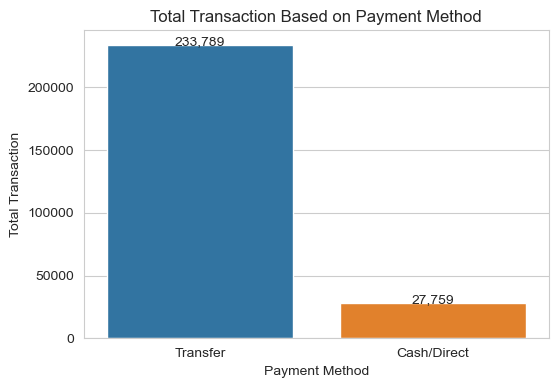

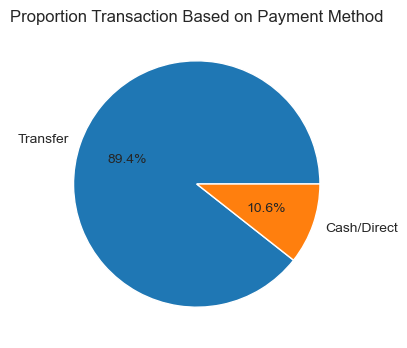

In [94]:
# melakukan grouping pada kolom metode_pembayaran berdasarkan Payment_categories

de['payment_metode'] = categorize(de)
de['payment_metode'] = de['Metode'].apply(lambda x: categorize(x))

# membuat barplot

plt.figure(figsize=(6, 4))
ax = sns.countplot(x="payment_metode", data=de)
for p in ax.patches:
    count = '{:,}'.format(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), count, ha='center', fontsize=10)

plt.title('Total Transaction Based on Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Transaction')
plt.show()

# membuat piechart

plt.figure(figsize=(6, 4))
counts_by_payment_category = de['payment_metode'].value_counts(normalize=True)
plt.pie(counts_by_payment_category.values, labels=counts_by_payment_category.index, autopct='%1.1f%%')
plt.title('Proportion Transaction Based on Payment Method')
plt.show()

In [95]:
#Mengecek Macam-macam Cabang
de['Cabang'].unique()

array(['Pusat', 'KC Bengkulu', 'KCP Malang', 'KC Ambon', 'KC Surabaya',
       'KC Balikpapan', 'KC Semarang', 'KC Yogyakarta', 'KC Pekanbaru',
       'KCP Purwokerto', 'KC Medan', 'KC Makassar', 'KC Bandung',
       'KC Padang', 'KC Aceh', 'Representatif', 'HI UK',
       'KC Bukit Tinggi', 'HI Australia', 'KCP Magelang', 'KCP Bontang',
       'KCP Lumajang', 'KCP Solok', 'HI South Korea', 'KCP Karawang'],
      dtype=object)

In [97]:
#Mengecek Macam-macam Kode_Valuta
de['Kode_Valuta'].unique()

array(['IDR', 'USD', 'EUR', 'GBP', 'TRY', 'SAR'], dtype=object)

In [98]:
# membuat dictionary Cabang HI
Branch_dict = {'Nasional': ['Pusat', 'KC Bengkulu', 'KCP Malang', 'KC Ambon', 'KC Surabaya', 'KCP Karawang'
                                   'KC Balikpapan', 'KC Semarang', 'KC Yogyakarta', 'KC Pekanbaru',
                                   'KCP Purwokerto', 'KC Medan', 'KC Makassar', 'KC Bandung','KC Padang', 
                                   'KC Aceh', 'KC Bukit Tinggi', 'KCP Magelang', 'KCP Bontang','KCP Lumajang', 'KCP Solok',]}

# Function pengelompokan Cabang HI
def categorize(Cabang_Kategori):
    for category, keywords in Branch_dict.items():
        for keyword in keywords:
            if keyword in Cabang_Kategori:
                return category
    return 'Internasional'

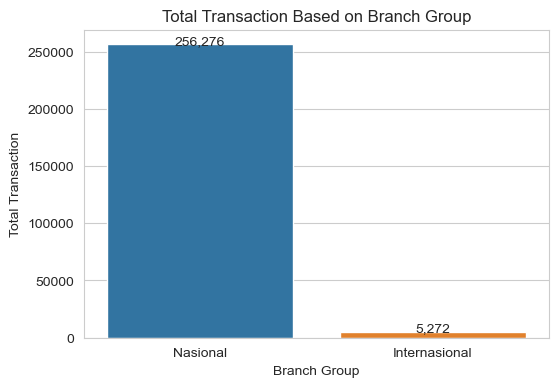

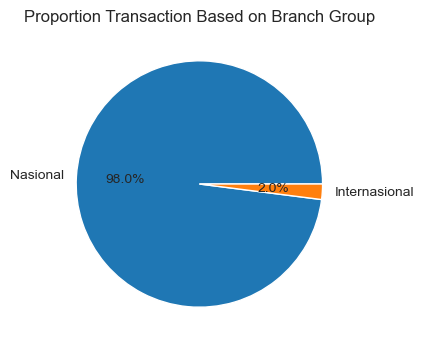

In [99]:
# melakukan grouping pada kolom metode_pembayaran berdasarkan Payment_categories

de['Grup_Cabang'] = categorize(de)
de['Grup_Cabang'] = de['Cabang'].apply(lambda x: categorize(x))

# membuat barplot

plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Grup_Cabang", data=de)
for p in ax.patches:
    count = '{:,}'.format(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), count, ha='center', fontsize=10)

plt.title('Total Transaction Based on Branch Group')
plt.xlabel('Branch Group')
plt.ylabel('Total Transaction')
plt.show()

# membuat piechart

plt.figure(figsize=(6, 4))
counts_by_payment_category = de['Grup_Cabang'].value_counts(normalize=True)
plt.pie(counts_by_payment_category.values, labels=counts_by_payment_category.index, autopct='%1.1f%%')
plt.title('Proportion Transaction Based on Branch Group')
plt.show()

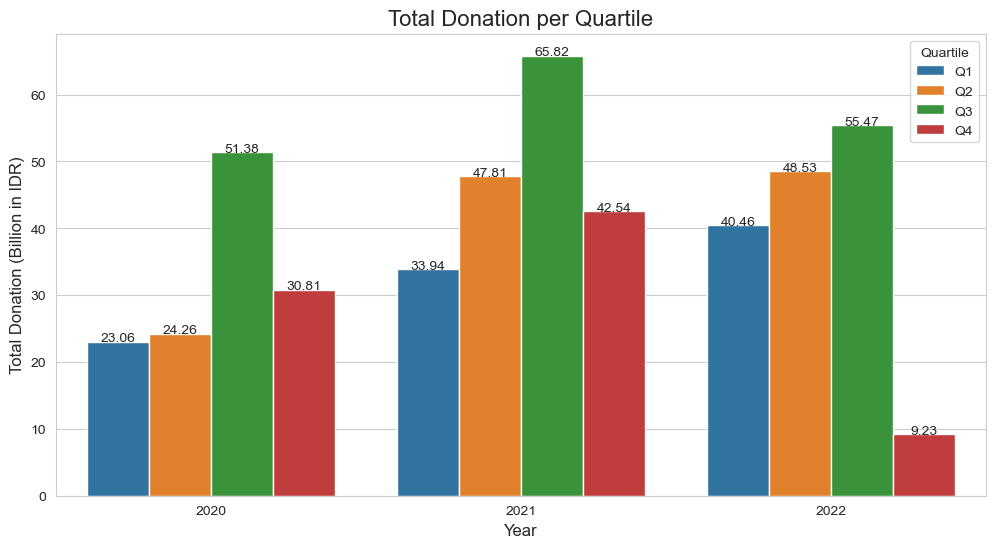

In [102]:
# membuat kolom baru untuk quartile berdasarkan Tanggal_Donasi
conditions = [
    (de['Tanggal_Donasi'].dt.month >= 1) & (de['Tanggal_Donasi'].dt.month <= 3),
    (de['Tanggal_Donasi'].dt.month >= 4) & (de['Tanggal_Donasi'].dt.month <= 6),
    (de['Tanggal_Donasi'].dt.month >= 7) & (de['Tanggal_Donasi'].dt.month <= 9),
    (de['Tanggal_Donasi'].dt.month >= 10) & (de['Tanggal_Donasi'].dt.month <= 12)
]

quartile = ['Q1', 'Q2', 'Q3', 'Q4']
de['Quartile'] = np.select(conditions, quartile)

# mengubah nilai Nilai_Ekuivalen menjadi miliar
de['Nilai_Ekuivalen_Miliar'] = de['Nilai_Ekuivalen'] / 1000000000

# melakukan grouping berdasarkan quartile dan tahun, kemudian menghitung total revenue
revenue = de.groupby(['Quartile', 'Tanggal_Donasi']).agg({'Year': 'first', 'Nilai_Ekuivalen_Miliar': 'sum'}).reset_index()
revenue = revenue.groupby(['Quartile', 'Year'])['Nilai_Ekuivalen_Miliar'].sum().reset_index()

# membuat barplot menggunakan seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Year", y="Nilai_Ekuivalen_Miliar", hue="Quartile", data=revenue)
for p in ax.patches:
    count = round(p.get_height(), 2)
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), count, ha='center', fontsize=10)
    
plt.title("Total Donation per Quartile", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Donation (Billion in IDR)", fontsize=12)
plt.show()


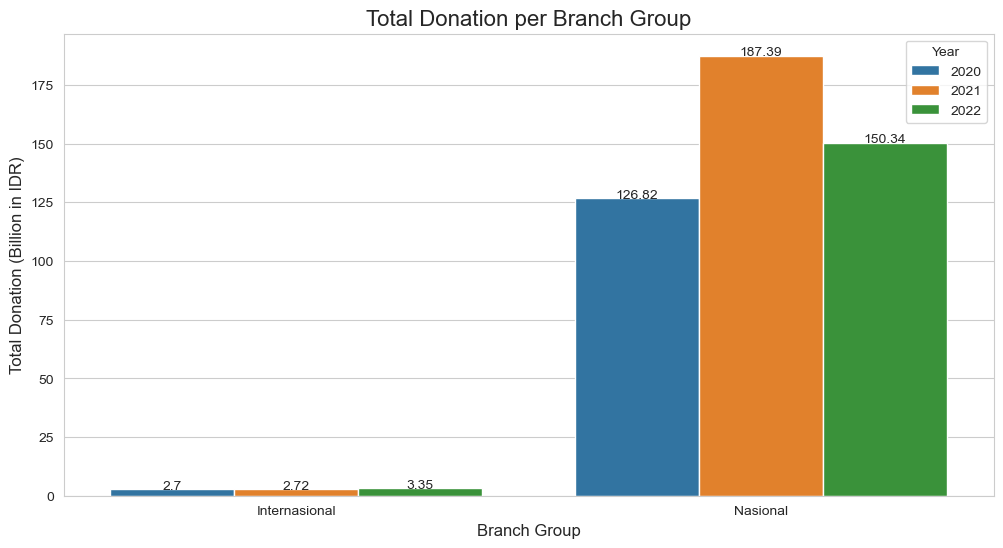

In [103]:
# melakukan grouping berdasarkan grup cabang, bulan, dan tahun, kemudian menghitung total revenue
revenue = de.groupby(['Grup_Cabang', 'Year'])['Nilai_Ekuivalen_Miliar'].sum().reset_index()

# membuat barplot menggunakan seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Grup_Cabang", y="Nilai_Ekuivalen_Miliar", hue="Year", data=revenue)
for p in ax.patches:
    count = round(p.get_height(), 2)
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), count, ha='center', fontsize=10)
    


plt.title("Total Donation per Branch Group", fontsize=16)
plt.xlabel("Branch Group", fontsize=12)
plt.ylabel("Total Donation (Billion in IDR)", fontsize=12)
plt.show()

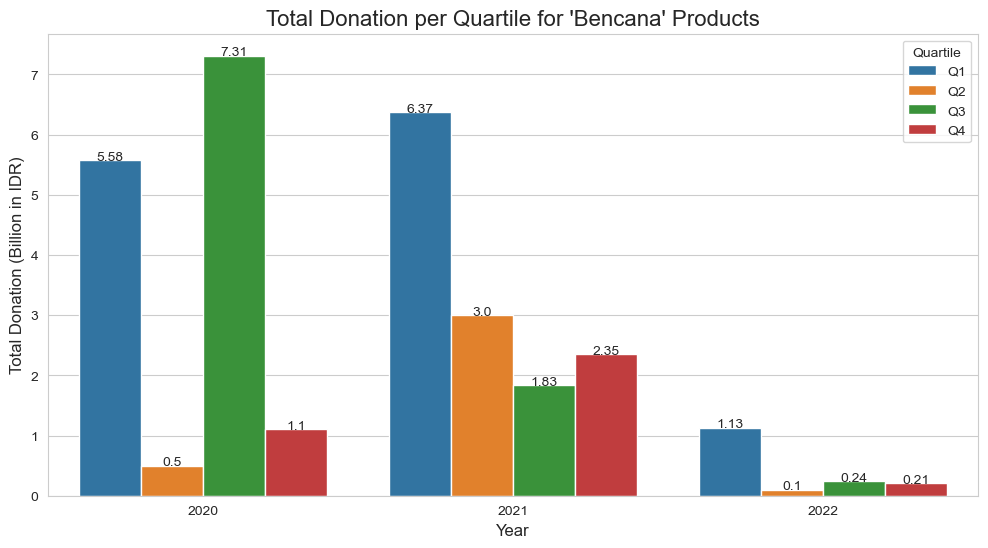

In [105]:
# mengambil data hanya untuk produk kategori 'Bencana'
de_bencana = de[de['Kategori_Produk_Umum'] == 'Bencana']

# melakukan grouping berdasarkan quartile, tahun, dan kategori produk
revenue_bencana = de_bencana.groupby(['Quartile', 'Year', 'Kategori_Produk_Umum'])['Nilai_Ekuivalen_Miliar'].sum().reset_index()

# membuat barplot menggunakan seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Year", y="Nilai_Ekuivalen_Miliar", hue="Quartile", data=revenue_bencana)
for p in ax.patches:
    count = round(p.get_height(), 2)
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), count, ha='center', fontsize=10)
plt.title("Total Donation per Quartile for 'Bencana' Products", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Donation (Billion in IDR)", fontsize=12)
plt.show()



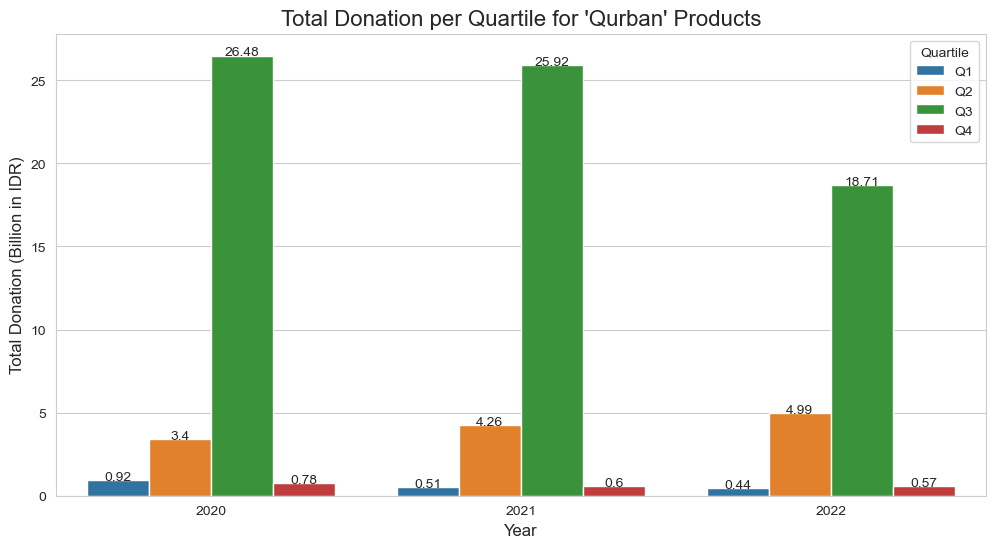

In [106]:
# mengambil data hanya untuk produk kategori 'Qurban'
de_Qurban = de[de['Kategori_Produk_Umum'] == 'Qurban']

# melakukan grouping berdasarkan quartile, tahun, dan kategori produk
revenue_Qurban = de_Qurban.groupby(['Quartile', 'Year', 'Kategori_Produk_Umum'])['Nilai_Ekuivalen_Miliar'].sum().reset_index()

# membuat barplot menggunakan seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Year", y="Nilai_Ekuivalen_Miliar", hue="Quartile", data=revenue_Qurban)
for p in ax.patches:
    count = round(p.get_height(), 2)
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), count, ha='center', fontsize=10)
plt.title("Total Donation per Quartile for 'Qurban' Products", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Donation (Billion in IDR)", fontsize=12)
plt.show()


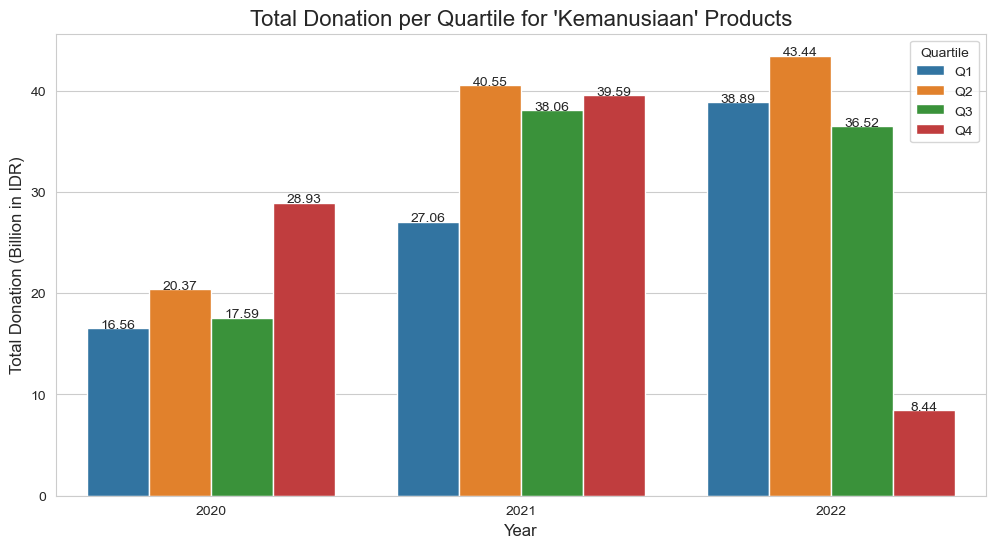

In [107]:
# mengambil data hanya untuk produk kategori 'Kemanusiaan'
de_Kemanusiaan = de[de['Kategori_Produk_Umum'] == 'Kemanusiaan']

# melakukan grouping berdasarkan quartile, tahun, dan kategori produk
revenue_Kemanusiaan = de_Kemanusiaan.groupby(['Quartile', 'Year', 'Kategori_Produk_Umum'])['Nilai_Ekuivalen_Miliar'].sum().reset_index()

# membuat barplot menggunakan seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Year", y="Nilai_Ekuivalen_Miliar", hue="Quartile", data=revenue_Kemanusiaan)
for p in ax.patches:
    count = round(p.get_height(), 2)
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), count, ha='center', fontsize=10)
plt.title("Total Donation per Quartile for 'Kemanusiaan' Products", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Donation (Billion in IDR)", fontsize=12)
plt.show()

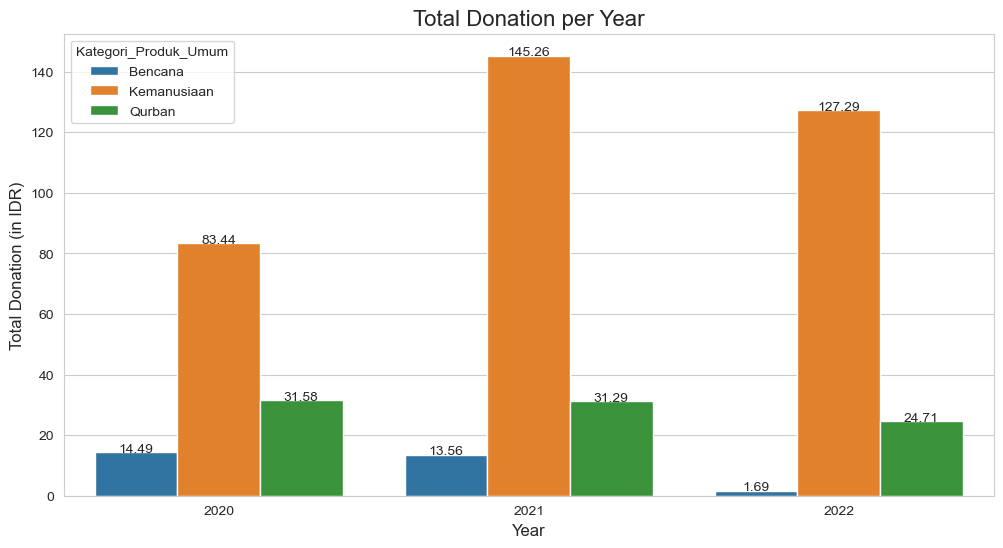

In [117]:
# melakukan filtering hanya untuk tiga kategori produk yang diinginkan
de_filtered = de[de['Kategori_Produk_Umum'].isin(['Bencana', 'Qurban', 'Kemanusiaan'])]

# menambahkan kolom tahun
de_filtered['Year'] = de_filtered['Tanggal_Donasi'].dt.year

# melakukan grouping berdasarkan kategori produk dan tahun, kemudian menghitung total donation
total_donation = de_filtered.groupby(['Kategori_Produk_Umum', 'Year'])['Nilai_Ekuivalen_Miliar'].sum().reset_index()

# membuat barplot menggunakan seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

ax = sns.barplot(x="Year", y="Nilai_Ekuivalen_Miliar", hue="Kategori_Produk_Umum", data=total_donation)
for p in ax.patches:
    count = round(p.get_height(), 2)
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), count, ha='center', fontsize=10)

plt.title("Total Donation per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Donation (in IDR)", fontsize=12)
plt.show()


In [26]:
# Slicing fitur Untuk Analisa
da = df_clean[['Tanggal_Donasi', 'Kategori', 'ID_Donatur', 'Nama_Donatur', 'ID_Produk', 'Nama_Produk', 'Nilai_Ekuivalen']]
da

,Tanggal_Donasi,Kategori,ID_Donatur,Nama_Donatur,ID_Produk,Nama_Produk,Nilai_Ekuivalen
0,2022-10-27,Uang,'00595432,Ahyani,'11801,Pembangunan Sarana Umum,15500
1,2022-10-26,Uang,'00581534,Transfer Niaga Syariah Qurban (8620.8080.8700),'11901,Infaq Shodaqoh,71000
2,2022-10-26,Uang,'00461689,Puji Putri Pertiwi,'10317,Orang Tua Asuh Palestina,550000
3,2022-10-26,Uang,'00461689,Puji Putri Pertiwi,'10316,Orang Tua Asuh Umum,150363
4,2022-10-26,Uang,'00578569,Keluarga Sari,'11901,Infaq Shodaqoh,7400
...,...,...,...,...,...,...,...
279157,2021-07-15,Qurban,'00558568,Susatyo Jati Pratomo,'12131,1/7 Sapi Tipe C,2450000
279158,2021-07-19,Qurban,'00577261,Joko Indaryanto,'12131,1/7 Sapi Tipe C,2450000
279159,2021-07-19,Qurban,'00577052,Syaifur Rachman,'12131,1/7 Sapi Tipe C,2450000
279160,2021-07-19,Qurban,'00577040,Winda Puspoyo,'12132,Sapi Tipe C,17150000


In [27]:
# Mengecek Data Duplicate ID_Donatur

da = df_clean.groupby(['ID_Donatur']) \
        .agg({'Nama_Donatur':'nunique'})\
        .reset_index()\
        .sort_values('Nama_Donatur', ascending=False)\
        .rename(columns={'Nama_Donatur':'Jumlah_Nama'})

da.head()

,ID_Donatur,Jumlah_Nama
734,'00098990,60
17519,'00504835,34
11639,'00406114,23
4635,'00224847,6
23982,'00550500,5


In [28]:
# Mengecek salah Satu ID dengan duplicate terbanyak

df_clean[df_clean['ID_Donatur']=="'00098990"]['Nama_Donatur'].unique()

array(['Hamba Allah (Semarang)', 'Warung jus 28',
       'Hamba Allah (Semarang) / RULI OPTIANA',
       'Hamba Allah (Semarang) / SETIAWAN',
       'Hamba Allah (Semarang)/intan',
       'Hamba Allah (Semarang) / DR. ERNA',
       'Hamba Allah (Semarang) / Nadila',
       'Hamba Allah (Semarang) / SRI SULASTRI UNGARAN',
       'Hamba Allah (Semarang)/pegadaian ampel',
       'Hamba Allah (Semarang)/mia didik bandeng',
       'Hamba Allah (Semarang)/kjks kube merapi',
       'Hamba Allah (Semarang)/toko bu sri',
       'Hamba Allah (Semarang)/ nur cholis',
       'Hamba Allah (Semarang)/planet mart',
       'Hamba Allah (Semarang)/gudeg bu dul',
       'Hamba Allah (Semarang)/puspita mart',
       'Hamba Allah (Semarang)/ suyatmi',
       'Hamba Allah (Semarang)/mie ayam mas mus',
       'Hamba Allah (Semarang)/slamet',
       'Hamba Allah (Semarang) / CITRA RESMI NURENI',
       'Hamba Allah (Semarang) / ENI SETYOWATI',
       'Hamba Allah (Semarang) / Hj. Lestari',
       'Hamba Alla

In [29]:
# Mengecek validasi data ID_Donatur
# memeriksa apakah nilai pada kolom 'Jumlah Nama' diatas 
# <= 1 maka nilai 'ID_Donatur' untuk baris tersebut ditambahkan ke daftar ID_Noanonim. 
# > 1  maka nilai 'ID_Donatur' untuk baris tersebut ditambahkan ke daftar ID_Anonim.

ID_Anonim = []
ID_Noanonim = []
for index, raw in da.iterrows():
  if raw['Jumlah_Nama'] <= 1:
      ID_Noanonim.append(raw['ID_Donatur'])
  else:
      ID_Anonim.append(raw['ID_Donatur'])

print(f"Jumlah ID Donatur Duplikat Nama :{len(ID_Anonim)}")    
print(f"Jumlah ID Donatur tidak Duplikat Nama :{len(ID_Noanonim)}")

# Memfilter data hanya pelanggan yang Non-Anonim yg dipakai
df_clean = df_clean[df_clean['ID_Donatur'].isin(ID_Noanonim)]
df_clean.head(10)

Jumlah ID Donatur Duplikat Nama :954
Jumlah ID Donatur tidak Duplikat Nama :50277


,ID_Donasi,Tanggal_Donasi,Cabang,Metode,Kategori,ID_Donatur,Nama_Donatur,ID_Produk,Nama_Produk,Kode_Valuta,Nilai_Ekuivalen,Marketer,Kategori_Produk_Umum,payment_metode,Grup_Cabang,Month,Year,Nilai_Ekuivalen_Miliar
0,D-2210-0005245,2022-10-27,Pusat,IPay88,Uang,'00595432,Ahyani,'11801,Pembangunan Sarana Umum,IDR,15500,Solusipeduli.org,Kemanusiaan,Transfer,Nasional,October,2022,1.550000e-05
4,D-2210-0005016,2022-10-26,KC Bengkulu,Tunai,Uang,'00578569,Keluarga Sari,'11901,Infaq Shodaqoh,IDR,7400,Indriati,Kemanusiaan,Cash/Direct,Nasional,October,2022,7.400000e-06
5,D-2210-0005032,2022-10-26,Pusat,Transfer,Uang,'00563193,kurnia afridilla,'11901,Infaq Shodaqoh,IDR,3,Solusipeduli.org,Kemanusiaan,Transfer,Nasional,October,2022,3.000000e-09
6,D-2210-0005031,2022-10-26,Pusat,Transfer,Uang,'00595374,Defri,'11901,Infaq Shodaqoh,IDR,3,Solusipeduli.org,Kemanusiaan,Transfer,Nasional,October,2022,3.000000e-09
7,D-2210-0004447,2022-10-26,Pusat,Transfer,Uang,'00300234,Suharyo Haryono,'903,Zakat Profesi/Penghasilan,IDR,2000000,Ira Nurulia,Kemanusiaan,Transfer,Nasional,October,2022,2.000000e-03
8,D-2210-0005055,2022-10-26,Pusat,Transfer,Uang,'00584571,U,'11901,Infaq Shodaqoh,IDR,8,Solusipeduli.org,Kemanusiaan,Transfer,Nasional,October,2022,8.000000e-09
9,D-2210-0004374,2022-10-26,Pusat,Transfer,Uang,'00499367,Muhammad Fahlesa Fatahilah,'10317,Orang Tua Asuh Palestina,IDR,1100000,Ira Nurulia,Kemanusiaan,Transfer,Nasional,October,2022,1.100000e-03
11,D-2210-0005056,2022-10-26,Pusat,Tunai,Uang,'00201721,TKIT INSAN CENDIKIA,'11301,Tabung Peduli Umum,IDR,3707000,Jamaludin,Kemanusiaan,Cash/Direct,Nasional,October,2022,3.707000e-03
12,D-2210-0005006,2022-10-26,Pusat,Transfer,Uang,'00578616,Salma Nisrina Bachar,'11901,Infaq Shodaqoh,IDR,6,Solusipeduli.org,Kemanusiaan,Transfer,Nasional,October,2022,6.000000e-09
13,D-2210-0005088,2022-10-26,KCP Malang,Tunai,Uang,'00585817,Laillatur Riva,'11901,Infaq Shodaqoh,IDR,96100,Prima Al Akbar,Kemanusiaan,Cash/Direct,Nasional,October,2022,9.610000e-05


In [30]:
#Mengecek Data Duplicate ID_Produk

da = df_clean.groupby(['ID_Produk']).agg({'Nama_Produk':'nunique'}).rename(columns={'Nama_Produk':'Jumlah Nama'}).reset_index().sort_values('Jumlah Nama', ascending=False)
da


,ID_Produk,Jumlah Nama
154,'12119,2
0,'101,1
2656,PRJ.001.001532,1
2644,PRJ.001.001516,1
2645,PRJ.001.001517,1
...,...,...
1331,PRJ.001.000130,1
1332,PRJ.001.000131,1
1333,PRJ.001.000132,1
1334,PRJ.001.000133,1


In [31]:
#memfilter jumlah produk yang duplicate (lebih dari satu)
da = da[da['Jumlah Nama'] > 1 ]

# memfilter df untuk mengecualikan baris yang nilai di kolom 'ID_Produk' ada di daftar nilai 'ID_Produk' di da
# Kemudian kita masukan ke df untuk selanjutnya hanya menggunakan data produk yang bernilai 1 saja (tidak duplicate)
df_clean = df_clean[~df_clean['ID_Produk'].isin(list(da['ID_Produk'].values))]
df_clean

,ID_Donasi,Tanggal_Donasi,Cabang,Metode,Kategori,ID_Donatur,Nama_Donatur,ID_Produk,Nama_Produk,Kode_Valuta,Nilai_Ekuivalen,Marketer,Kategori_Produk_Umum,payment_metode,Grup_Cabang,Month,Year,Nilai_Ekuivalen_Miliar
0,D-2210-0005245,2022-10-27,Pusat,IPay88,Uang,'00595432,Ahyani,'11801,Pembangunan Sarana Umum,IDR,15500,Solusipeduli.org,Kemanusiaan,Transfer,Nasional,October,2022,1.550000e-05
4,D-2210-0005016,2022-10-26,KC Bengkulu,Tunai,Uang,'00578569,Keluarga Sari,'11901,Infaq Shodaqoh,IDR,7400,Indriati,Kemanusiaan,Cash/Direct,Nasional,October,2022,7.400000e-06
5,D-2210-0005032,2022-10-26,Pusat,Transfer,Uang,'00563193,kurnia afridilla,'11901,Infaq Shodaqoh,IDR,3,Solusipeduli.org,Kemanusiaan,Transfer,Nasional,October,2022,3.000000e-09
6,D-2210-0005031,2022-10-26,Pusat,Transfer,Uang,'00595374,Defri,'11901,Infaq Shodaqoh,IDR,3,Solusipeduli.org,Kemanusiaan,Transfer,Nasional,October,2022,3.000000e-09
7,D-2210-0004447,2022-10-26,Pusat,Transfer,Uang,'00300234,Suharyo Haryono,'903,Zakat Profesi/Penghasilan,IDR,2000000,Ira Nurulia,Kemanusiaan,Transfer,Nasional,October,2022,2.000000e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279157,D-2107-0004616,2021-07-15,Pusat,Transfer,Qurban,'00558568,Susatyo Jati Pratomo,'12131,1/7 Sapi Tipe C,IDR,2450000,Arief Rachman Pratama,Qurban,Transfer,Nasional,July,2021,2.450000e-03
279158,D-2107-0007163,2021-07-19,Pusat,Transfer,Qurban,'00577261,Joko Indaryanto,'12131,1/7 Sapi Tipe C,IDR,2450000,Solusipeduli.org,Qurban,Transfer,Nasional,July,2021,2.450000e-03
279159,D-2107-0006750,2021-07-19,Pusat,Transfer,Qurban,'00577052,Syaifur Rachman,'12131,1/7 Sapi Tipe C,IDR,2450000,Arief Rachman Pratama,Qurban,Transfer,Nasional,July,2021,2.450000e-03
279160,D-2107-0006801,2021-07-19,Pusat,Transfer,Qurban,'00577040,Winda Puspoyo,'12132,Sapi Tipe C,IDR,17150000,Solusipeduli.org,Qurban,Transfer,Nasional,July,2021,1.715000e-02


In [32]:
df_clean.to_csv('data_clean.csv', index=False)

In [33]:
import pickle

dict_user_name = df_clean.set_index('ID_Donatur')['Nama_Donatur'].to_dict()
pickle.dump(dict_user_name, open('pickle_user_name.pkl', 'wb'))

dict_product_name = df_clean.set_index('ID_Produk')['Nama_Produk'].to_dict()
pickle.dump(dict_product_name, open('pickle_produk_name.pkl', 'wb'))

In [34]:
# Untuk melihat apakah user membeli produk tertentu tidak
# data yang tampil ada 1 untuk produk yang dibeli dan Nan untuk yang tidak dibeli donatur
# unstack() digunakan untuk memutar indeks 'ID_Produk' menjadi tajuk kolom
# dengan aggregate kita akan dapat kombinasi unik 'ID_Donatur' dan 'ID_Produk' sebagai indeks
# hitungan unik 'ID_Produk' sebagai nilai kolom, dan 'ID_Donatur' dan 'ID_Produk' sebagai kolom terpisah
# reset_index() kemudian digunakan untuk memindahkan kolom 'ID_Donatur' dan 'ID_Produk' dari indeks ke kolom biasa.

da = df_clean.groupby(['ID_Donatur','ID_Produk']).agg({'ID_Produk':'nunique'}).unstack().reset_index()
da.head(5)

ID_Donatur ID_Produk                                            \
ID_Produk                 '101 '10101 '10102 '10103 '10201 '10203 '10204   
0          '00027850       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1          '00027893       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2          '00028108       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3          '00028138       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4          '00028166       NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                         ...                                               \
ID_Produk '10205 '10206  ... PRJ.803.000032 PRJ.803.000033 PRJ.803.000035   
0            NaN    NaN  ...            NaN            NaN            NaN   
1            NaN    NaN  ...            NaN            NaN            NaN   
2            NaN    NaN  ...            NaN            NaN            NaN   
3            NaN    NaN  ...            NaN            NaN            NaN   
4            NaN    NaN  ...            NaN            NaN            NaN   

                                                                       \
ID_Produk PRJ.803.000036 PRJ.901.000001 PRJ.901.000002 PRJ.901.000003   
0                    NaN            NaN            NaN            NaN   
1                    NaN            NaN            NaN            NaN   
2                    NaN            NaN            NaN            NaN   
3                    NaN            NaN            NaN            NaN   
4                    NaN            NaN            NaN            NaN   

                                                        
ID_Produk PRJ.901.000005 PRJ.901.000009 PRJ.901.000010  
0                    NaN            NaN            NaN  
1                    NaN            NaN            NaN  
2                    NaN            NaN            NaN  
3                    NaN            NaN            NaN  
4                    NaN            NaN            NaN  

[5 rows x 3977 columns]

In [35]:
# #Membuat looping untuk Collaborative Filtering
# #kita akan membuat filtering untuk berfokus hanya pada donatur dan produk saja. dimana row untuk ID donatur dan column untuk ID produk
# #karena hasil grouping diatas masih belum rapi kita akan rapikan dengan menggunakan looping untuk kolomnya

i=0
col = ['ID_Donatur']
while i < len(da.columns):
  if da.columns[i][1] == '':   #Untuk Menghilangkan kolom pertama yang kosong dari hasil grouping diatas
    i += 1 
    continue
  col.append(da.columns[i][1]) 
  i += 1

da.columns = col
da = da.replace({np.nan:0})  #Mereplace semua data yang bernilai Nan Menjadi 0
da.head(5)

,ID_Donatur,'101,'10101,'10102,'10103,'10201,'10203,'10204,'10205,'10206,...,PRJ.803.000032,PRJ.803.000033,PRJ.803.000035,PRJ.803.000036,PRJ.901.000001,PRJ.901.000002,PRJ.901.000003,PRJ.901.000005,PRJ.901.000009,PRJ.901.000010
0,'00027850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,'00027893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'00028108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,'00028138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,'00028166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Ambil sample 25% dari total data
da = da.sample(frac=0.25).set_index('ID_Donatur')
da

,'101,'10101,'10102,'10103,'10201,'10203,'10204,'10205,'10206,'10208,...,PRJ.803.000032,PRJ.803.000033,PRJ.803.000035,PRJ.803.000036,PRJ.901.000001,PRJ.901.000002,PRJ.901.000003,PRJ.901.000005,PRJ.901.000009,PRJ.901.000010
ID_Donatur,,,,,,,,,,,,,,,,,,,,,
'00497135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00100941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00552295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00433116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00571802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
'00572750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00589935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00558092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Menghitung Similarity User
cosine_sim = cosine_similarity(da)
user_similarity = pd.DataFrame(cosine_sim, index=da.index, columns=da.index)
user_similarity

ID_Donatur,'00497135,'00100941,'00552295,'00433116,'00571802,'00588842,'00287947,'00520546,'00583576,'00583492,...,'00344865,'00478821,'00562126,'00220452,'00583497,'00572750,'00589935,'00558092,'00590137,'00476792
ID_Donatur,,,,,,,,,,,,,,,,,,,,,
'00497135,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.447214,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
'00100941,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00552295,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.447214,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00433116,0.0,0.0,0.0,1.0,0.0,0.0,0.707107,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00571802,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.353553,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
'00572750,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.353553,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
'00589935,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000,1.0,0.0,...,0.447214,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
'00558092,0.0,0.0,0.0,0.0,0.5,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.707107,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0


In [41]:
# Contoh satu user
picked_id = "'00497135"

# Number of similar users
# n = 10

# User similarity threashold

similarity_threshold = 0.5

# Get top n similar users

similar_id = user_similarity[user_similarity[picked_id] > similarity_threshold][picked_id].sort_values(ascending=False)
similar_id = similar_id.drop(picked_id)

# Print out top n similar users

print(f"User yang sama dengan user {picked_id}:", similar_id)

User yang sama dengan user '00497135: ID_Donatur
'00186638    1.00000
'00554750    1.00000
'00569968    1.00000
'00569141    1.00000
'00265512    1.00000
              ...   
'00038098    0.57735
'00118760    0.57735
'00288021    0.57735
'00563794    0.57735
'00571685    0.57735
Name: '00497135, Length: 1369, dtype: float64


In [42]:
# Remove product that have been picked

picked_id_buy = da[da.index==picked_id].dropna(axis=1,how='all')
picked_id_buy

,'101,'10101,'10102,'10103,'10201,'10203,'10204,'10205,'10206,'10208,...,PRJ.803.000032,PRJ.803.000033,PRJ.803.000035,PRJ.803.000036,PRJ.901.000001,PRJ.901.000002,PRJ.901.000003,PRJ.901.000005,PRJ.901.000009,PRJ.901.000010
ID_Donatur,,,,,,,,,,,,,,,,,,,,,
'00497135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Product that similar users picked. Remove product that none of the similar users have picked

picked_id_buy = picked_id_buy.drop(columns= picked_id_buy.columns[(picked_id_buy == 0).any()])
picked_id_buy

,'11905
ID_Donatur,
'00497135,1.0


In [46]:
# Dasar Menghitung Rekomendasi Produk
#filter products have not been picked by user but picked by others similar users

similar_id_buy =  da[da.index.isin(similar_id.index)]
similar_id_buy =  similar_id_buy[similar_id_buy.index != picked_id]
similar_id_buy                            


,'101,'10101,'10102,'10103,'10201,'10203,'10204,'10205,'10206,'10208,...,PRJ.803.000032,PRJ.803.000033,PRJ.803.000035,PRJ.803.000036,PRJ.901.000001,PRJ.901.000002,PRJ.901.000003,PRJ.901.000005,PRJ.901.000009,PRJ.901.000010
ID_Donatur,,,,,,,,,,,,,,,,,,,,,
'00589025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00582680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00289802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00551078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00235005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
'00562183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00588934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00589027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Remove picked product from the product list

similar_id_buy.drop(picked_id_buy.columns, axis=1, inplace=True, errors='ignore')
similar_id_buy

,'101,'10101,'10102,'10103,'10201,'10203,'10204,'10205,'10206,'10208,...,PRJ.803.000032,PRJ.803.000033,PRJ.803.000035,PRJ.803.000036,PRJ.901.000001,PRJ.901.000002,PRJ.901.000003,PRJ.901.000005,PRJ.901.000009,PRJ.901.000010
ID_Donatur,,,,,,,,,,,,,,,,,,,,,
'00589025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00582680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00289802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00551078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00235005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
'00562183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00588934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'00589027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Menghitung Product Score Probability

product_score = {}
for i in similar_id_buy.columns:
  product_rating = similar_id_buy[i]
  total = 0
  count = 0
  for u in similar_id.index:
    if pd.isna(product_rating[u]) == False:
      score = similar_id[u] * product_rating[u]
      total += score
      count += 1
  product_score[i] = total/count

#Membuat ranking dari produk score dan menyimpannya dalam bentuk dataframe
product_score = pd.DataFrame(product_score.items(), columns=['Product', 'Product_Score'])
ranked_product_score = product_score.sort_values(by='Product_Score', ascending=False)
ranked_product_score

,Product,Product_Score
137,'11901,0.085200
64,'11401,0.038985
84,'11705,0.023731
81,'11702,0.023172
160,'12127,0.020547
...,...,...
1378,PRJ.001.000180,0.000000
1379,PRJ.001.000181,0.000000
1380,PRJ.001.000182,0.000000
1381,PRJ.001.000183,0.000000


In [49]:
# Rekomendasi produk user kepada user picked_id

id_product_recom = ranked_product_score['Product'].values[0]
product_recom = dict_product_name[id_product_recom]

print(f"User atas nama {dict_user_name[picked_id]} driekomendasikan produk {product_recom}")

User atas nama Rudi Agung Ristant driekomendasikan produk Infaq Shodaqoh


In [50]:
da.index

Index([''00497135', ''00100941', ''00552295', ''00433116', ''00571802',
       ''00588842', ''00287947', ''00520546', ''00583576', ''00583492',
       ...
       ''00344865', ''00478821', ''00562126', ''00220452', ''00583497',
       ''00572750', ''00589935', ''00558092', ''00590137', ''00476792'],
      dtype='object', name='ID_Donatur', length=12501)

In [51]:
list_user = []

for picked_id in da.index[0:100]:
  dict_user = {}

  # Contoh satu user
  similarity_threshold = 0.5
  similar_id = user_similarity[user_similarity[picked_id] > similarity_threshold][picked_id].sort_values(ascending=False)
  similar_id = similar_id.drop(picked_id)

  # Menunjukan produk yang dibeli oleh picked_id
  picked_id_buy = picked_id_buy.drop(columns= picked_id_buy.columns[(picked_id_buy == 0).any()])
  picked_id_buy

  # Dasar Menghitung Rekomendasi Produk
  similar_id_buy =  da[da.index.isin(similar_id.index)]
  similar_id_buy = similar_id_buy[similar_id_buy.index != picked_id]
  similar_id_buy.drop(picked_id_buy.columns, axis=1, inplace=True, errors='ignore')
  similar_id_buy

  # Menghitung Score Probability
  product_score = {}
  for i in similar_id_buy.columns:
    product_rating = similar_id_buy[i]
    total = 0
    count = 0
    for u in similar_id.index:
      if pd.isna(product_rating[u]) == False:
        score = similar_id[u] * product_rating[u]
        total += score
        count += 1
    product_score[i] = total/count

  product_score = pd.DataFrame(product_score.items(), columns=['Product', 'Product_Score'])
  ranked_product_score = product_score.sort_values(by='Product_Score', ascending=False)

  # Rekomendasi produk user kepada user picked_id
  id_product_recom = ranked_product_score['Product'].values[0]
  product_recom = dict_product_name[id_product_recom]
#   print(f"User atas nama {dict_user_name[picked_id]} driekomendasikan produk {product_recom}")
  
  # Menyimpan Hasil Rekomendasi Kedalam List untuk Dijadikan Dataframe
  dict_user['User_Name'] = dict_user_name[picked_id]
  dict_user['Product_Recom_Name'] = product_recom
  dict_user['Probability_Score'] = ranked_product_score.values[0][1]
  list_user.append(dict_user)

In [52]:
Hasil = pd.DataFrame(list_user)
Hasil

,User_Name,Product_Recom_Name,Probability_Score
0,Rudi Agung Ristant,Infaq Shodaqoh,0.085200
1,Ery Kusriyanto,"Zakat Emas, Perak dan Uang",0.772311
2,JULIANINGRUM (SDIT PONDOK DUTA),Berbagi Bingkisan,0.802259
3,Ummi Kulsum,1/7 Sapi Tipe A,0.828666
4,uwi,Infaq Shodaqoh,0.601309
...,...,...,...
95,Mandiri 6034947000391907,Peduli Bencana Indonesia,0.850382
96,Ulti Yani,Infaq Shodaqoh,0.281269
97,Amalia Mutmainah / Fathurochman,Infaq Shodaqoh,0.741204
98,Mohamad Alfha Wirakoswara,1/7 Sapi Tipe A,0.581895


In [53]:
Hasil.to_excel('rekap_rekomendasi.xlsx', index=False)